In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer


In [4]:
ds_path = "./Project-C-Brochud/Project/data/processed/data_test.csv"

In [5]:
data = pd.read_csv(ds_path)

In [6]:
def transform_pipeline():
    log_pipeline = make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(np.log, feature_names_out="one-to-one"),
        StandardScaler()
    )
    default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                        StandardScaler())
    preprocessing = ColumnTransformer([
            ("log", log_pipeline, ["GKV", "VIX_Close"]),
        ],
    remainder=default_num_pipeline)  
    return preprocessing

In [7]:
data.set_index('Date', inplace=True)
    
y = data['target']
X = data.drop(columns=[
    'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dollar Volume',
    'return_1d', 'log_return_1d', 'target'
], errors='ignore')


# Sécurité pour les NaN/inf
X.replace([np.inf, -np.inf], np.nan, inplace=True)
if X.isnull().sum().sum() > 0:
    X.dropna(inplace=True)
    y = y[X.index]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [9]:
X_train

,ATR,bb_low,bb_high,bb_mid,GKV,MACD,RSI,return_1w,return_2w,return_4w,...,MACD_roll_mean_21,RSI_roll_mean_5,RSI_roll_mean_10,RSI_roll_mean_21,STOCHk_roll_mean_5,STOCHk_roll_mean_10,STOCHk_roll_mean_21,STOCHd_roll_mean_5,STOCHd_roll_mean_10,STOCHd_roll_mean_21
Date,,,,,,,,,,,,,,,,,,,,,
2009-08-10,-0.584447,9.047610,9.169388,9.108499,0.000034,1.399692,72.007490,0.005534,0.012517,0.016116,...,0.711972,73.461353,72.764674,67.793025,93.077046,94.233676,87.585630,94.253639,95.206813,84.098576
2009-08-11,-0.588929,9.063935,9.163092,9.113513,0.000042,1.315936,64.696585,-0.008448,0.007924,0.016116,...,0.807677,71.135140,72.113567,68.604439,89.526857,92.316782,90.091155,92.397367,93.984205,87.295676
2009-08-12,-0.515294,9.072737,9.162586,9.117661,0.000167,1.303637,68.927099,0.008689,0.015908,0.016116,...,0.899486,70.285333,72.066975,69.555025,85.412319,90.320302,91.898918,89.338741,92.290253,89.858567
2009-08-13,-0.543572,9.079884,9.163021,9.121453,0.000053,1.298673,70.101703,0.015333,0.013225,0.016116,...,0.981077,70.069270,71.889276,70.077985,82.545048,88.820362,92.474009,85.828075,90.485815,91.488027
2009-08-14,-0.505380,9.088206,9.161094,9.124650,0.000139,1.233328,64.582578,-0.005194,0.008133,0.016116,...,1.048938,68.063091,71.110179,70.194256,80.877473,87.732835,92.432213,82.944947,88.957833,92.268380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-06,0.997882,9.749662,9.796261,9.772961,0.000051,-0.096130,55.773314,0.035710,0.004282,-0.001169,...,-0.382264,52.880752,48.277832,48.298247,60.641849,48.265142,45.335716,46.202563,45.290923,43.225490
2015-02-09,0.897353,9.749682,9.796195,9.772938,0.000019,-0.029326,53.192585,0.021207,0.001428,-0.000115,...,-0.386169,54.409191,48.488968,48.170849,73.005219,50.049789,47.007861,59.762139,47.947614,45.133418
2015-02-10,0.825024,9.749058,9.798103,9.773580,0.000019,0.102985,56.382691,0.011454,0.013753,0.003214,...,-0.383003,55.134466,49.824316,48.433806,81.963570,53.532343,48.115163,71.870213,50.615758,46.819580


In [10]:
preprocessing = transform_pipeline()
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

In [13]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-1.646209,-0.726011,1.468472,1.634771,1.714792,1.678143,0.408265,0.384970,0.479769,1.856568,...,-0.795301,0.127135,-0.072058,-0.656694,0.938688,0.453817,-0.553429,0.894050,0.115877,-0.704849
1,-0.727126,-0.475449,1.293897,1.634339,1.732350,1.686498,0.558718,0.444629,0.878346,1.442124,...,-0.715020,0.266882,0.081629,-0.540322,1.028609,0.765452,-0.351600,0.964603,0.443946,-0.543110
2,-1.526381,-0.552503,1.075900,1.636323,1.746688,1.694522,0.650976,0.384525,0.370185,0.651451,...,-0.626826,0.332753,0.154320,-0.462880,1.135019,1.014575,-0.143058,1.050913,0.749965,-0.352155
3,-0.736070,-0.588310,0.936988,1.639405,1.757218,1.701252,0.675540,0.230008,0.251194,0.530934,...,-0.535587,0.369229,0.207700,-0.395964,1.219360,1.150934,0.048647,1.146037,0.984340,-0.150623
4,0.945031,-0.818565,1.071350,1.635034,1.772120,1.706284,0.805552,0.598618,0.389266,0.387951,...,-0.437796,0.435683,0.257117,-0.312748,1.244338,1.198914,0.212312,1.219152,1.130072,0.038134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,1.789946,1.205944,1.212730,1.749194,1.701505,1.730474,-0.538697,-1.496799,-1.024385,-1.321473,...,-0.258276,-0.445147,-0.740028,-0.363101,-0.207419,-0.647931,0.235408,-0.445434,-0.528657,0.211597
343,0.985682,0.940950,1.445001,1.699401,1.730149,1.718870,-1.020063,-1.982241,-2.263414,-1.638947,...,-0.286032,-0.801865,-0.884087,-0.490089,-0.289054,-0.781360,0.132501,-0.295245,-0.651062,0.204310
344,-0.514204,0.113380,1.548913,1.684514,1.733646,1.712926,-1.175400,-1.176712,-1.480797,-0.851088,...,-0.331594,-1.007401,-0.909952,-0.574209,-0.570429,-0.896031,-0.049887,-0.362107,-0.782851,0.105120
345,-0.071176,-0.297272,1.686885,1.683026,1.732176,1.711442,-1.061165,-0.489589,-0.417463,-0.083690,...,-0.373877,-1.017561,-0.841569,-0.593072,-0.751041,-0.840219,-0.171893,-0.546350,-0.847499,-0.031215


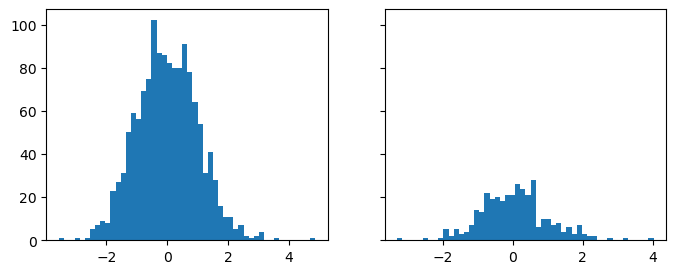

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axs[0].hist(X_train[:, 0], bins=50)    
axs[1].hist(X_test[:, 0], bins=50)
plt.show()


# TEST DISTRIB

In [12]:
columns = X.columns
columns

Index(['ATR', 'bb_low', 'bb_high', 'bb_mid', 'GKV', 'MACD', 'RSI', 'return_1w',
       'return_2w', 'return_4w', 'return_1m', 'return_2m', 'return_3m',
       'return_6m', 'return_9m', 'return_12m', 'Mkt_RF', 'SMB', 'HML', 'RMW',
       'CMA', 'RF', 'VIX_Close', 'STOCHk', 'STOCHd', 'return_1d_lag_1',
       'RSI_lag_1', 'ATR_roll_mean_5', 'ATR_roll_mean_10', 'ATR_roll_mean_21',
       'MACD_roll_mean_5', 'MACD_roll_mean_10', 'MACD_roll_mean_21',
       'RSI_roll_mean_5', 'RSI_roll_mean_10', 'RSI_roll_mean_21',
       'STOCHk_roll_mean_5', 'STOCHk_roll_mean_10', 'STOCHk_roll_mean_21',
       'STOCHd_roll_mean_5', 'STOCHd_roll_mean_10', 'STOCHd_roll_mean_21'],
      dtype='object')

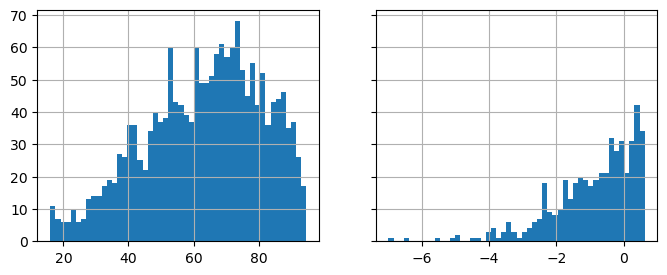

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
data["STOCHd_roll_mean_21"].hist(ax=axs[0], bins=50)
data["ATR_roll_mean_21"].apply(np.log).hist(ax=axs[1], bins=50)
plt.show()

## Distributions 
### col -> transfo to apply

- GKV -> log
- MACD -> ok
- RSI -> ok
- return_1w -> ok (but high values at extrem)
- return_2w -> ok (but high values at extrem)
- return_4w -> ok (but high values at extrem)
- return_1m -> ok (but high values at extrem)
- return_2m -> ok (but high values at extrem)
- return_3m -> ok (but high values at right)
- return_6m -> ok (but high values at right)
- return_9m -> ok (but high values at extrem)
- return_12m -> ok (but high values at extrem)
- Mkt_RF -> ok
- SMB -> ok
- HML -> ok
- RMW -> ok
- CMA -> ok
- RF -> strange (one value)
- VIX_Close -> log
- STOCHk -> to study
- STOCHd -> to study
- return_1d_lag_1 -> ok
- RSI_lag_1 -> ok
- ATR_roll_mean_5 -> to study
- ATR_roll_mean_10 -> to study
- ATR_roll_mean_21 -> to study
- MACD_roll_mean_5 -> ok
- MACD_roll_mean_10 -> ok
- MACD_roll_mean_21 -> ok
- RSI_roll_mean_5 -> ok
- RSI_roll_mean_10 -> ok
- RSI_roll_mean_21 -> ok
- STOCHk_roll_mean_5 -> to study
- STOCHk_roll_mean_10 -> to study
- STOCHk_roll_mean_21 -> ok
- STOCHd_roll_mean_5 -> to study
- STOCHd_roll_mean_10 -> to study
- STOCHd_roll_mean_21 -> ok





